<a href="https://colab.research.google.com/github/GerardoMunoz/ML_2025/blob/main/Hopfield_Covariance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


---

# **Linear Algebra Topics**

---

## **Dot Product**

The dot product of two vectors $u$ and $v$ is defined as:

$$ u \cdot v = \sum_{i=1}^{n} u_i v_i $$

Alternatively, using matrix notation:

$$ u \cdot v = u^T v $$


**Example: Dot Product in 3D**

Given two vectors in 3D:

$$ u = (2, -1, 3), \quad v = (4, 0, -2) $$

The dot product is computed as:

$$ u \cdot v = (2)(4) + (-1)(0) + (3)(-2) $$

$$ = 8 + 0 - 6 = 2 $$

Thus, the dot product of $u$ and $v$ is **2**.

**Properties:**
- Commutative: \( u \cdot v = v \cdot u \)
- Distributive: \( u \cdot (v + w) = u \cdot v + u \cdot w \)
- Scalar multiplication: \( (cu) \cdot v = c (u \cdot v) \)

---

## **Magnitude of a Vector**

The magnitude (or norm) of a vector $u$ is given by:

$$ ||u|| = \sqrt{u \cdot u} = \sqrt{\sum_{i=1}^{n} u_i^2} $$

In 3D, for a vector $u$:

$$ u = (x, y, z) $$

The magnitude is:

$$ ||u|| = \sqrt{x^2 + y^2 + z^2} $$

**Example in 3D**

Given the vector:

$$ u = (3, -4, 12) $$

The magnitude is calculated as:

$$ ||u|| = \sqrt{3^2 + (-4)^2 + 12^2} $$

$$ = \sqrt{9 + 16 + 144} $$

$$ = \sqrt{169} = 13 $$

Thus, the magnitude of $u$ is **13**.

**Properties:**
- **Non-negative:** The magnitude of any vector is always $ \geq 0 $.
- **Zero Vector:** $ ||u|| = 0 $ if and only if $ u $ is the zero vector.
- **Homogeneity (Scaling):** For any scalar $ c $, $ ||c u|| = |c| ||u|| $.
- **Triangle Inequality:** $ ||u + v|| \leq ||u|| + ||v|| $.

---



## **Projection in 1D**

To project a vector $u$ onto a  vector $v$:


$$ \text{proj}_v u = \frac{u \cdot v}{v \cdot v} v $$

This gives the closest point to $u$ on the line that spans $v$

---

## **Pseudo Inverse**

For a matrix **A**, the Moore-Penrose pseudo-inverse \( A^+ \) is defined as:

$$ A^+ = (A^T A)^{-1} A^T $$

When **A** is not square or not invertible, this gives the best least-squares solution to \( Ax = b \).

**Properties:**
- \( A A^+ A = A \)
- \( A^+ A A^+ = A^+ \)
- Symmetry in transposition: \( (A^+)^T = (A^T)^+ \)




---

# **Vector Distances and Similarities**
If the operation satisfies these properties it is called **distance**.

- Non-negative: \( d(u, v) \geq 0 \)
- Identity: \( d(u, v) = 0 \iff u = v \)
- Symmetry: \( d(u, v) = d(v, u) \)
- Triangle inequality: \( d(u, w) \leq d(u, v) + d(v, w) \)

But if the operation that allows comparing vectors does not satisfy all the properties is called **similarity**.

---

## **Euclidean Distance**

The Euclidean distance between two vectors **u** and **v** is given by:

$$ d(u, v) = \sqrt{\sum_{i=1}^{n} (u_i - v_i)^2} $$

Alternatively, in vector notation:

$$ d(u, v) = || u - v || $$


---

## **Manhattan Distance**

Also called **L1 norm**, the Manhattan distance is:

$$ d_1(u, v) = \sum_{i=1}^{n} |u_i - v_i| $$

This measures the total absolute difference across dimensions.

**Best for:**
- Grid-based distance calculations (e.g., city block distance)
- Sparse or high-dimensional data

---

## **Cosine Similarity**

Measures the angle between vectors:

$$ \text{cosine}(u, v) = \frac{u \cdot v}{||u|| ||v||} $$

**Range:**
- $ -1 $ (opposite direction)
- $ 0 $ (orthogonal)
- $ 1 $ (same direction)

Useful in:
- Text analysis (TF-IDF vectors)
- Recommender systems

---


## **Minkowski Distance**

The generalized form of Euclidean and Manhattan distances:

$$ d_p(u, v) = \left( \sum_{i=1}^{n} |u_i - v_i|^p \right)^{\frac{1}{p}} $$

- $ p = 1 $ → Manhattan Distance
- $ p = 2 $ → Euclidean Distance
- $ p \to \infty $ → Chebyshev Distance (max difference along any coordinate)

---

## **Hamming Distance**

Counts differing elements:

$$ d_H(u, v) = \sum_{i=1}^{n} \mathbf{1}(u_i \neq v_i) $$

Used for:
- Comparing binary strings (e.g., error detection)
- DNA sequencing

---

# **Applications of Distances & Similarities**

- **Machine Learning**: Nearest Neighbor classification, clustering
- **Natural Language Processing**: Text similarity, document comparison
- **Image Processing**: Feature matching, object recognition
- **Graph Theory**: Network analysis, social connections

---



## **Gram matrix: Covariance Matrix and Hopfield Network**

### Introduction
Given this two vectors in $\mathbb{R}^3$

$$
v_1 = \begin{bmatrix} 0.5 \\ 0.5 \\ -1 \end{bmatrix}, \quad
v_2 = \begin{bmatrix} -1 \\ 0.5 \\ 0.5 \end{bmatrix}
$$

We can define a transformation from $\mathbb{R}^2$ to $\mathbb{R}^3$ using the matriz $A=[v_1\ \ v_2]$:

$$
\begin{bmatrix}
y_1\\y_2\\y_3
\end{bmatrix}
=\begin{bmatrix}
0.5 & -1 \\
0.5 & 0.5 \\
-1 & 0.5
\end{bmatrix}
\begin{bmatrix}
x_1\\x_2\end{bmatrix}
$$


It is also possible to define a transformation from $\mathbb{R}^3$ to $\mathbb{R}^2$ using $A^T$


$$
\begin{bmatrix}
x'_1\\x'_2
\end{bmatrix}
=\begin{bmatrix}
0.5 & 0.5 & -1 \\
-1 & 0.5 & 0.5
\end{bmatrix}
\begin{bmatrix}
y'_1\\y'_2\\y'_3\end{bmatrix}
$$




Here we will study the composition of both $A^TA$ and $AA^T$ which are called **Gram matrices**.



### Gram matrix is a matrix of dot products.

$$
A = \begin{bmatrix} v_1 & v_2 & \cdots & v_n \end{bmatrix}
$$

$$
A^T = \begin{bmatrix} v_1^T \\ v_2^T \\ \vdots \\ v_n^T \end{bmatrix}
$$

$$
A^TA = \begin{bmatrix} v_1^T \\ v_2^T \\ \vdots \\ v_n^T \end{bmatrix}\begin{bmatrix} v_1 & v_2 & \cdots & v_3 \end{bmatrix}
$$

$$
A^TA = \begin{bmatrix}
v_1 \cdot v_1 & v_1 \cdot v_2 & \cdots & v_1 \cdot v_n\\
v_2 \cdot v_1& v_2 \cdot v_2  & \cdots & v_2 \cdot v_n\\
\vdots & \vdots & \ddots & \vdots &\\
v_n \cdot v_1& v_n \cdot v_2  & \cdots & v_n \cdot v_n \end{bmatrix}
$$

- **Size**: If $A$ is $ m \times n $ matrix  (i.e. each vector $v_i$ has $m$ rows) then $A^TA$ is $ n \times n $ square matrix. And $AA^T$ is $ m \times m $ square matrix. It represents different things if $m>n$ or if $m<n$.
- **Diagonal values**: $ G_{ii} = v_i \cdot v_i $ → **squared norm** of each vector.  
- **Off-diagonal values**: $ G_{ij} = v_i \cdot v_j $ → **similarity** between vectors.  

$A^TA$ is used in the Moore-Penrose pseudo-inverse. But in the next two sections we are going to use $AA^T$, where the matrix is square $m \times m$ and $m$ is the number of components of each vector $v_i$.



### **Hopfield Network**
**More dimensions than vectors**. So if A is $ m \times n$ then $m>n$.

$$
A = \begin{bmatrix} v_1 & v_2 & \cdots & v_n \end{bmatrix}
$$


Each vector $v_i$ is a pattern that will be stored in the  Hopfield Network  **weight matrix** ($W$), computed as:

$$
W =  AA^T
$$

In our example, it is a  transformation from $\mathbb{R}^3$ to $\mathbb{R}^3$.
If
$$
A=\begin{bmatrix}
0.5 & -1 \\
0.5 & 0.5 \\
-1 & 0.5
\end{bmatrix}
$$
then
$$
\begin{bmatrix}
y_1\\y_2\\y_3
\end{bmatrix}
=\begin{bmatrix}
0.5 & -1 \\
0.5 & 0.5 \\
-1 & 0.5
\end{bmatrix}
\begin{bmatrix}
0.5 & 0.5 & -1 \\
-1 & 0.5 & 0.5
\end{bmatrix}
\begin{bmatrix}
y'_1\\y'_2\\y'_3\end{bmatrix}
$$



$$
\begin{bmatrix}
y_1\\y_2\\y_3
\end{bmatrix}
=
\begin{bmatrix}1.25 & -0.25 & -1.0\\-0.25 & 0.5 & -0.25\\-1.0 & -0.25 & 1.25\end{bmatrix}
\begin{bmatrix}
y'_1\\y'_2\\y'_3\end{bmatrix}
$$





The weights $W$ allow us to recover the patterns of positive (+1) and negative (-1) values, where each column of $A$ is one pattern.

The first column is

$$
v_1 = \begin{bmatrix} 0.5 \\ 0.5 \\ -1 \end{bmatrix},
$$

So it has a pattern of positives and negatives.

$$
\begin{bmatrix} 1 \\ 1 \\ -1 \end{bmatrix},
$$

If we add noise, for example to the second row, it sign changes.

$$
\begin{bmatrix} 1 \\ -1 \\ -1 \end{bmatrix},
$$

Now we use $W$ to restore the pattern.


$$
\begin{bmatrix}1.25 & -0.25 & -1.0\\-0.25 & 0.5 & -0.25\\-1.0 & -0.25 & 1.25\end{bmatrix}
\begin{bmatrix} 0 \\ 1 \\ -1 \end{bmatrix}
=\begin{bmatrix}0.75\\0.75\\-1.5\end{bmatrix}
$$


So the answer recovers the pattern.

$$
\begin{bmatrix} 1 \\ 1 \\ -1 \end{bmatrix},
$$








### **Covariance Matrix**
**More vectors than dimensions**.  So if A is $ m \times n$ then $m<n$.

$$
A = \begin{bmatrix} v_1 & v_2 & \cdots & v_n \end{bmatrix}
$$


In statistics, the **covariance matrix** is:

$$
C = AA^T
$$

In our example it is a transformation from $\mathbb{R}^2$ to $\mathbb{R}^2$.
If
$$
A=\begin{bmatrix}
0.5 & 0.5 & -1 \\
-1 & 0.5 & 0.5
\end{bmatrix}
$$
Then
$$
\begin{bmatrix}
x'_1\\x'_2
\end{bmatrix}
=\begin{bmatrix}
0.5 & 0.5 & -1 \\
-1 & 0.5 & 0.5
\end{bmatrix}
\begin{bmatrix}
0.5 & -1 \\
0.5 & 0.5 \\
-1 & 0.5
\end{bmatrix}
\begin{bmatrix}
x_1\\x_2\end{bmatrix}
$$

$$
\begin{bmatrix}
x'_1\\x'_2
\end{bmatrix}
=\begin{bmatrix}1.5 & -0.75\\-0.75 & 1.5\end{bmatrix}
\begin{bmatrix}
x_1\\x_2\end{bmatrix}
$$








#### Viewing the transpose of $A$

Suppose that all the vectors of the matrix are in $\mathbb{R}^2$, and that the sum of all vectors is the vector zero. So we can write

$$
A = \begin{bmatrix} v_{1x} & v_{2x} & \cdots & v_{nx} \\ v_{1y} & v_{2y} & \cdots & v_{ny} \end{bmatrix}
$$

The transpose is

$$
B=A^T=\begin{bmatrix} v_{1x} & v_{1y} \\ v_{2x} & v_{2y} \\ \vdots & \vdots \\ v_{nx} & v_{ny} \end{bmatrix} = \begin{bmatrix} u_{1} & u_{2}  \end{bmatrix}
$$

So now we have only two vectors, the first one has all the $x$ components, and the second one has all the $y$ components. Now we are going to calculate the covariance matrix and interpret it. Remember that $B=A^T$ and so $A=B^T$.

$$
C=AA^T=B^TB =  \begin{bmatrix} u_{1}^T \\ u_{2}^T  \end{bmatrix} \begin{bmatrix} u_{1} & u_{2}  \end{bmatrix} = \begin{bmatrix} u_{1} \cdot u_1 & u_1 \cdot u_{2} \\ u_{2} \cdot u_1 & u_2 \cdot u_{2} \end{bmatrix}
$$

The first element is
$$u_{1} \cdot u_1=||u_1||^2$$
that is the square of the norm of the vector with all $x$ components. So if the x components are high then the norm is high, so this component represents how the points are distributed along the $x$ axis.  The same will happen with all elements of the diagonal, in particular, the last element
$$  u_2 \cdot u_{2}=||u_2||^2$$
represents the distribution of the points along the $y$ axis. This is called the variance of the axis.


The second element and the third element are the same because the dot product is commutative. So this matriz is simetric.
$$ u_1 \cdot u_{2} = u_{2} \cdot u_1$$
This dot product is high if both components are large, and this happens if the points are along the line $x=y$. So this component represents how the points are related in both components. In general, the non-diagonal elements represent the relation of both components. This is called the covariance between the two axes.


The Covariance Matrix $C$ (or the weight matrix) when multiplying a vector ($Cw$), transforms the components to better match the patterns.

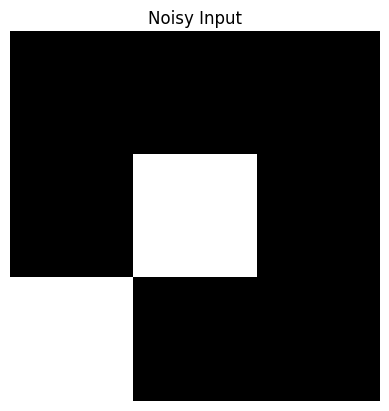

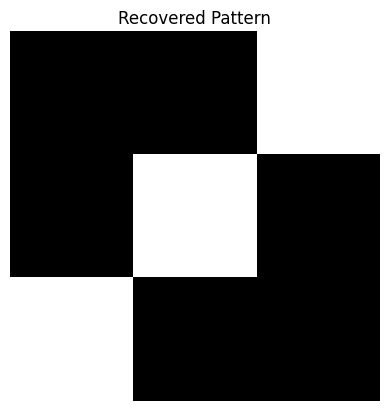

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sign(x):
    return np.where(x >= 0, 1, -1)

def train_hopfield(patterns):
    N = patterns.shape[1]
    W = np.zeros((N, N))
    for p in patterns:
        W += np.outer(p, p)
    np.fill_diagonal(W, 0)  # No self-connections
    return W / N  # Normalize weights

def recall_hopfield(W, input_pattern, steps=5):
    s = input_pattern.copy()
    for _ in range(steps):
        s = sign(W @ s)  # Update all neurons at once
    return s

def display_pattern(pattern, title="Pattern"):
    size = int(np.sqrt(len(pattern)))
    plt.imshow(pattern.reshape(size, size), cmap="gray")
    plt.title(title)
    plt.axis("off")
    plt.show()

# Define 3x3 patterns for '/' and '\'
pattern_slash = np.array([
    -1, -1,  1,
    -1,  1, -1,
     1, -1, -1
])

pattern_backslash = np.array([
     1, -1, -1,
    -1,  1, -1,
    -1, -1,  1
])

# Store patterns in Hopfield Network
patterns = np.array([pattern_slash, pattern_backslash])
W = train_hopfield(patterns)

# Create a noisy input
noisy_input = np.array([
    -1, -1, -1,
    -1,  1, -1,
     1, -1, -1
])

display_pattern(noisy_input, "Noisy Input")

# Recall stored pattern
recovered_pattern = recall_hopfield(W, noisy_input)
display_pattern(recovered_pattern, "Recovered Pattern")

